In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
data_path = '/content/drive/My Drive/Colab Notebooks/NLP/data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load data

In [0]:
import pandas as pd

# Load raw data
rt_data_raw = pd.read_csv(data_path + 'RT_cleaned.csv', header = 0)


# Make a copy of df_raw
rt_data = rt_data_raw.copy(deep = True)

In [3]:
# Print the dimension of rt_data
pd.DataFrame([[rt_data.shape[0], rt_data.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,13409,9


In [4]:
rt_data

,Unnamed: 0,id,review,rating,fresh,critic,top_critic,publisher,date
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
2,15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
3,16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
4,23,3,Those who said Don DeLillo's book was unfilmab...,2/5,rotten,Mike Scott,0,Times-Picayune,"September 7, 2012"
...,...,...,...,...,...,...,...,...,...
13404,54399,2000,Wasabi is one of the best times I've had latel...,3/5,fresh,David Cornelius,0,eFilmCritic.com,"February 3, 2003"
13405,54401,2000,"Been there, done that, liked it much better th...",2/5,rotten,Cherryl Dawson,0,TheMovieChicks.com,"November 15, 2002"
13406,54415,2000,Fluffy and disposible.,2.5/5,rotten,Maitland McDonagh,0,TV Guide,"October 2, 2002"
13407,54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


## Preprocess

### Preprocess rt_data

In [0]:
# drop useless column
rt_data = rt_data.drop(columns=['Unnamed: 0','id', 'publisher', 'date', 'critic', 'top_critic'])

In [0]:
def cleanRating(row):
  thisRating = row['rating']
  strList = thisRating.split('/')
  rating = round(float(strList[0]))
  return str(rating)

In [0]:
rt_data['rating'] = rt_data.apply(cleanRating, axis = 1)

In [0]:
# Set target
rt_target = 'rating'

In [0]:
from sklearn.preprocessing import LabelEncoder

# Init the LabelEncoder
le = LabelEncoder()

# Encode the categorical features in the data
rt_data[rt_target] = le.fit_transform(rt_data[rt_target].astype(str))

In [11]:
rt_data.head()

,review,rating,fresh
0,A distinctly gallows take on contemporary fina...,3,fresh
1,Cronenberg is not a director to be daunted by ...,2,rotten
2,For better or worse - often both - Cosmopolis ...,3,fresh
3,For one of the smartest films I've seen in a w...,4,fresh
4,Those who said Don DeLillo's book was unfilmab...,2,rotten


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Divide the data into training and testing
rt_df_train, rt_df_test = train_test_split(rt_data, train_size = 0.8, random_state = 42)

# Reset the index
rt_df_train, rt_df_test = rt_df_train.reset_index(drop = True), rt_df_test.reset_index(drop = True)

In [14]:
# Print the dimension of rt_df_train
pd.DataFrame([[rt_df_train.shape[0], rt_df_train.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,10727,3


In [15]:
# Print the dimension of rt_df_test
pd.DataFrame([[rt_df_test.shape[0], rt_df_test.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,2682,3


### Text data preprocessing

In [16]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def review_to_text_2(review, remove_stopwords):

  # remove non-letter
  letters = re.sub('[^a-zA-Z]', ' ', review)
  words = letters.lower().split()
  
  # remove stopwords
  if remove_stopwords:
    all_stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in all_stop_words]

  return words

In [0]:
X_rt_train = [' '.join(review_to_text_2(review, True)) for review in rt_df_train['review']]
y_rt_train = rt_df_train[rt_target]

In [19]:
X_rt_train[0]

'slick ensemble melodrama appears touch every female issue regarding motherhood family relationships'

In [0]:
X_rt_test = [' '.join(review_to_text_2(review, True)) for review in rt_df_test['review']]
y_rt_test = rt_df_test[rt_target]

### Get text features

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVec
count_vec = CountVectorizer()

x_rt_count = count_vec.fit_transform(X_rt_train)

In [0]:
# Tf_Idf
tfidf_vec = TfidfVectorizer()

X_rt_tfidf = tfidf_vec.fit_transform(X_rt_train)

In [23]:
# Print
print(X_rt_tfidf)

  (0, 12635)	0.2892896529504784
  (0, 5594)	0.21410849737283202
  (0, 10072)	0.35317991847395236
  (0, 12589)	0.33947528861937554
  (0, 8279)	0.32494779555139597
  (0, 5733)	0.2844923094221435
  (0, 5283)	0.2177500584225843
  (0, 15961)	0.2763189230186012
  (0, 689)	0.3142616088760804
  (0, 9657)	0.24569020630462216
  (0, 5090)	0.2627909977523921
  (0, 14170)	0.3033351244905884
  (1, 9139)	0.39722335106374373
  (1, 17501)	0.43058167808742137
  (1, 14850)	0.3717013588079629
  (1, 2624)	0.4266528714600411
  (1, 6505)	0.5801882927122242
  (2, 17152)	0.1910507481495458
  (2, 13894)	0.19412730961119937
  (2, 9338)	0.14801052294526482
  (2, 7786)	0.3168577938995134
  (2, 1426)	0.2671492803719215
  (2, 7948)	0.3168577938995134
  (2, 8460)	0.29394985307457633
  (2, 4424)	0.2296391326454849
  :	:
  (10724, 13576)	0.1555826300364039
  (10724, 12429)	0.22629079129375287
  (10724, 3862)	0.2481075097611256
  (10724, 144)	0.17959251505486876
  (10725, 6346)	0.49955973421165034
  (10725, 6022)	0.4944

### Model

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

pip_count = Pipeline([('count_vec', CountVectorizer(analyzer='word')), ('mnb', MultinomialNB())])
pip_tfidf = Pipeline([('tfidf_vec', TfidfVectorizer(analyzer='word')), ('mnb', MultinomialNB())])

params_count = {'count_vec__binary': [True, False], 'count_vec__ngram_range': [(1, 1), (1, 2)], 'mnb__alpha': [0.1, 1.0, 10.0]}
params_tfidf = {'tfidf_vec__binary': [True, False], 'tfidf_vec__ngram_range': [(1, 1), (1, 2)], 'mnb__alpha': [0.1, 1.0, 10.0]}


In [25]:
mnbc_clb_rt = GridSearchCV(pip_count, params_count, cv=4, verbose=1)
mnbc_clb_rt.fit(X_rt_train, y_rt_train)
mnbc_clb_rt_predictions = mnbc_clb_rt.predict(X_rt_test)


print(mnbc_clb_rt.best_score_)
print(mnbc_clb_rt.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   25.6s finished


0.4658336024405732
{'count_vec__binary': True, 'count_vec__ngram_range': (1, 1), 'mnb__alpha': 1.0}


In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [50]:
#Classification report for cv of words 
mnb_cv_report = classification_report(y_rt_test, mnbc_clb_rt_predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(mnb_cv_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.40      0.02      0.05       165
           2       0.51      0.53      0.52       731
           3       0.34      0.23      0.27       653
           4       0.48      0.76      0.59       916
           5       0.26      0.03      0.05       200

    accuracy                           0.46      2682
   macro avg       0.33      0.26      0.25      2682
weighted avg       0.43      0.46      0.42      2682



In [0]:
#confusion matrix for cv of words
mnb_cv_cm = confusion_matrix(y_rt_test, mnbc_clb_rt_predictions)

In [36]:
# print
print(mnb_cv_cm)

[[  0   1   9   2   5   0]
 [  0   4  97  14  50   0]
 [  0   3 388 142 195   3]
 [  0   1 168 150 333   1]
 [  0   1  87 123 695  10]
 [  0   0  15   9 171   5]]


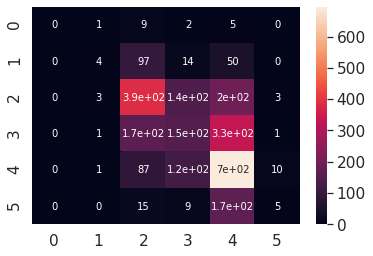

In [38]:
# plot
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) # for label size
sn.heatmap(mnb_cv_cm, annot = True, annot_kws = {"size": 10}) # font size

plt.show()

In [26]:
mnbt_clf_rt = GridSearchCV(pip_tfidf, params_tfidf, cv=4, verbose=1)
mnbt_clf_rt.fit(X_rt_train, y_rt_train)
mnbt_clf_rt_predictions = mnbt_clf_rt.predict(X_rt_test)

print(mnbt_clf_rt.best_score_)
print(mnbt_clf_rt.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   25.0s finished


0.45511294715957656
{'mnb__alpha': 0.1, 'tfidf_vec__binary': True, 'tfidf_vec__ngram_range': (1, 2)}


In [52]:
#Classification report for cv of words 
mnb_tv_report = classification_report(y_rt_test, mnbt_clf_rt_predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(mnb_tv_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.67      0.01      0.02       165
           2       0.51      0.50      0.50       731
           3       0.33      0.18      0.24       653
           4       0.45      0.80      0.58       916
           5       0.50      0.01      0.02       200

    accuracy                           0.45      2682
   macro avg       0.41      0.25      0.23      2682
weighted avg       0.45      0.45      0.40      2682



In [0]:
#confusion matrix for cv of words
mnb_tv_cm = confusion_matrix(y_rt_test, mnbt_clf_rt_predictions)

In [44]:
# print
print(mnb_tv_cm)

[[  0   0   9   1   7   0]
 [  0   2  83  11  69   0]
 [  0   1 363 117 249   1]
 [  0   0 158 119 376   0]
 [  0   0  86  98 731   1]
 [  0   0  13  10 175   2]]


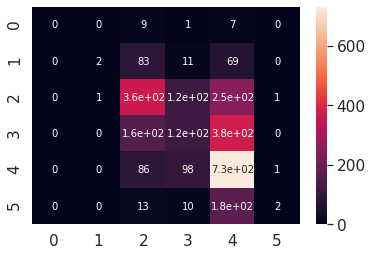

In [46]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(mnb_tv_cm, annot = True, annot_kws = {"size": 10}) # font size

plt.show()